In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [57]:
def sample_normal(dimension, sample_size):
    A = np.zeros((sample_size,dimension))
    for i in range(sample_size):
        A[i,:] = np.random.multivariate_normal(np.array([0]*dimension),np.identity(dimension))
    return A

def euclidean_distance(x):
    return (x.dot(x))**0.5

def lin_interp(alpha, xa, xb):
    return alpha*xa + (1-alpha)* xb

def polor_interp(alpha, xa, xb):
    return (alpha**0.5)*xa + ((1-alpha)**0.5)*xb


def multi_likelihood(x):
    dimension = x.shape[0]
    return stats.multivariate_normal.logpdf(x, np.array([0] * dimension),
                                  np.identity(dimension))

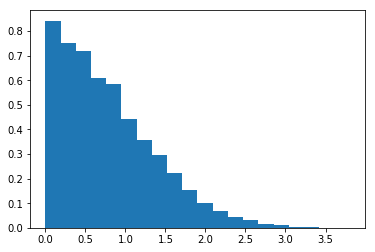

In [35]:
#Question 2
np.random.seed(0)
A = sample_normal(1, 10000)
distances = []
for i in range(10000):
    distances.append(euclidean_distance(A[i,:]))
fig = plt.hist(distances, bins= 20, density=True)
plt.savefig("Q2.png")
plt.show()

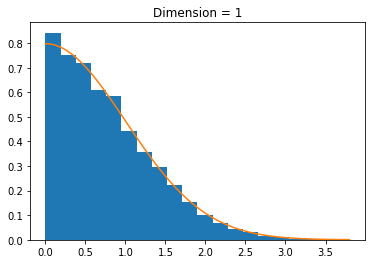

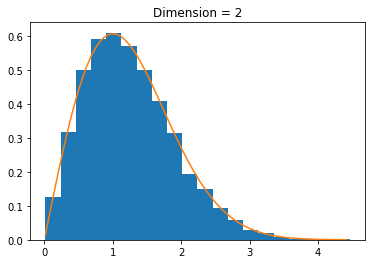

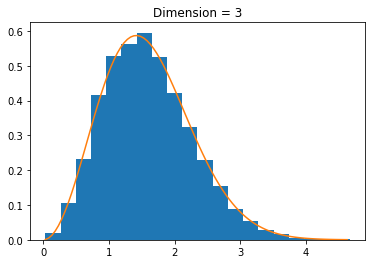

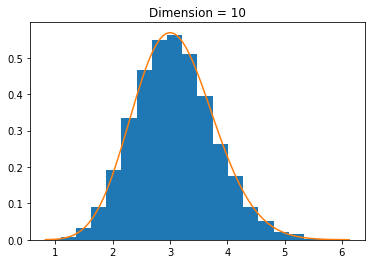

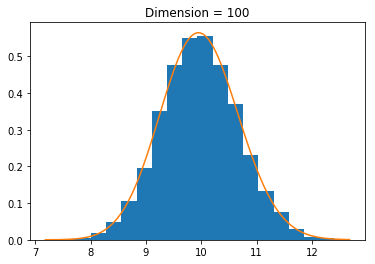

In [39]:
#Question 3 & 4
dimensions = [1,2,3,10,100]
for d in dimensions:
    np.random.seed(0)
    A = sample_normal(d, 10000)
    distances = []
    for i in range(10000):
        distances.append(euclidean_distance(A[i,:]))
    fig = plt.hist(distances,bins= 20, density=True)
    x = np.arange(min(distances), max(distances), 0.05)
    plt.plot(x, stats.chi.pdf(x,df = d))
    plt.title("Dimension = " + str(d))
    plt.savefig("Q3_" + str(d) + ".png")
    plt.show()

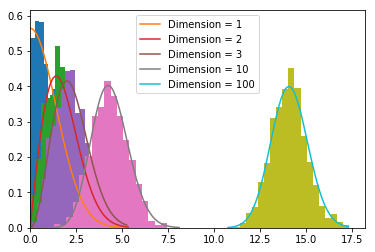

In [76]:
#Question 5
for d in dimensions:
    np.random.seed(0)
    sample = 1000
    A = sample_normal(d, sample)
    B = sample_normal(d, sample)
    distances = []
    for i in range(sample):
        distances.append(euclidean_distance(A[i, :]-B[i,:]))
    fig = plt.hist(distances, bins=20, density=True)
    x = np.arange(min(distances), max(distances), 0.05)
    k = (1/2**0.5) 
    plt.plot(x, k * stats.chi.pdf(k*x, df=d), label="Dimension = " + str(d))
plt.xlim(left = 0)
plt.legend()
plt.savefig("Q5_" + str(d) + ".png")
plt.show()

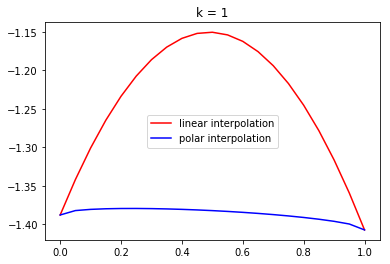

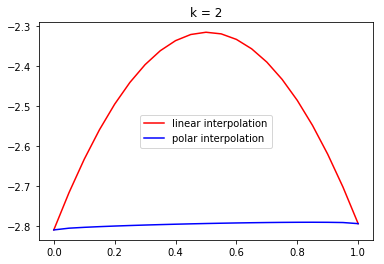

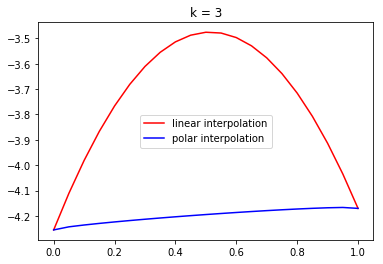

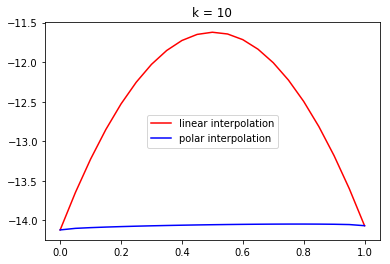

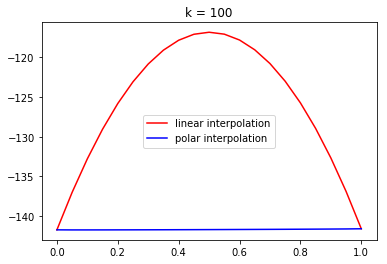

In [74]:
for i in range(len(dimensions)):
    np.random.seed(0)
    num_sample = 1000
    A = sample_normal(dimensions[i], num_sample)
    B = sample_normal(dimensions[i], num_sample)
    alphas = np.arange(0, 1.05, 0.05)
    averagesl = []
    averagesp = []
    for alpha in alphas:
        suml = 0.0
        sump = 0.0
        L = lin_interp(alpha,A,B)
        P = polor_interp(alpha,A,B)
        for j in range(num_sample):
            suml += multi_likelihood(L[j])
            sump += multi_likelihood(P[j])
        averagesl.append(suml/num_sample)
        averagesp.append(sump/num_sample)
    plt.plot(alphas, averagesl, color="r", label = "linear interpolation")
    plt.plot(alphas, averagesp, color="b", label = "polar interpolation")               
    plt.title("k = "+str(dimensions[i]))
    plt.legend()
    plt.savefig("Q6_" + str(dimensions[i])+".png")
    plt.show()